# Machine Learning Lab \#1

This notebook is on github at https://goo.gl/qfKVde. 

## Software Setup
*When writing this section, I took 20 minutes. I expect you will take a bit less. *

According to my own tests, it looks like you can install and run all of the software you need on on the lab machines without requiring root privileges.  In this section I have provided the comands I used in install python and the necessary libraries. You may copy and paste these into a terminal on your lab machine. To open a terminal I use `⌘+[SPACE]`   and type `terminal`. 
You can pastw each line into a terminal on the OSX lab machines

```bash
$ curl https://repo.continuum.io/archive/Anaconda2-4.4.0-MacOSX-x86_64.sh -O
$ bash Anaconda2-4.4.0-MacOSX-x86_64.sh
```
This will start an installation program that will ask you questions. Accept license and all default settings when prompted.  When it finishes, it will add a line to your `.bash_profile` file so that anaconda (and the python related tools) are prepended to your `PATH` environment variable.   You may either  add [path/to/anaconda2] to PATH yourself, or just re-run the `.bash_profile` script (as I have done)

```bash
$ source ~/.bash_profile
```

At this point in time the `conda` program should be on your search path. You can test it by typing `which conda`, and/or `conda --version`. 


One of the most frustrating things about developing software is when “it works on my machine” (but only mine).  Related to this is the problem that happens when something works until you update your libraries for some other project, then you return to old code and it is broken. 


To solve this, python programmers use virtual environments.  All of the libraries you need are installed into a self-contained environment, within which you can make sure you have the packages your software needs.  To create an environment for this project use this command line:

```bash
$ conda create -n ser627a anaconda jupyter numpy scipy scikit-learn
```

Let’s break that command down:
* `conda` is a program with a number of subcommands (just like `git` is). The second token after `conda` is the subcommand. 
* The `create` subcommand creates a new virtual environment that will also use the `conda` package manager.
* The `-n ser627a`  options names the new environment. 
* The `anaconda`  package is actually a meta-package, it installs all of the default / useful python packages that python programmers tend to assume are present. 
* The `jupyter` package is the jupyter notebook we will be using as our python editor. This `.ipynb` file you are currently reading is the type of ducument that `jupyter` helps you to create. 
* The `numpy` package is the numerical N-Dimensional array (tensor) package.
* The `scipy` package is another meta-package with various tools that are useful for scientific computing. 
* The `scikit-learn` package is a suite of tools that are useful for machine learning in python.

Note that you will need to activate  the environment before these packages become available to you. 

```bash
$ source activate ser627a
```
Since you want `conda` to change environment variables in __your__ process, you must use `source` or a period `.` to `.` to run the `activate` script without creating a child process. 

You should see the word `(ser627a)` prepended to your prompt in the terminal
If you want to install new software packages while inside of an environment, you may use `conda install <packagename>` to install it. For example:

```bash
(ser627a)$ conda install configargparse
```

While in your `ser627a` environment, start a jupyter notebook web server by typing this:

```bash
(ser627a)$ jupyter notebook
```

Your browser should pop up, you can now use your jupyter notebook!

>Up until now, you may have been reading this in a browser. 
>Before continuing, you should download and open this notebook. 

>In a second terminal, change directories into the folder that you have `jupyter notebook` running.  From there >you can download this notebook:

> ```bash
> curl https://goo.gl/1G9Qy9 -o lab1.ipynb
> ```

> Now look for the downloaded notebook in the browser that popped up when you ran jupyter, and begin editing. 

In a `jupyter` notebook you edit code in cells, which are executed when you press `SHIFT+ENTER`. Similar to tools like `vim`, the `jupyter` editor allows you to run some extra editin commands by pressing the `ESC` key. You can also access most of those commands through the menus. The most important are:
* ESC + M -- Change the current cell to use [**[M]**arkdown](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) instead of executing the code
* ESC + Y -- Change  the current cell to P**[Y]**thon
* ESC + L -- Show **[L]**ine numbers
* ESC + A -- Add a new cell **[A]**bove the current cell
* ESC + B -- Add a new cell **[B]**elow the current cell
* ENTER -- Start editing the cell egain 

One of the coolest features of jupyter is that you can display non-textual output such as plots or figures right in the notebook. 

Some of the most popular plotting and scientific options can be automatically imported into your notebook's python ineterprer using the `%pylab inline` directive to jupyter. 

> **NOTE:** Jupyter interprets lines that start with `%` as speciel ('magic') directives to the jupyter program rather than as python statements. If a cell starts with a double percent-sign (`%%`) then it can change the way that entire cell is interprete. For example, you can cause it to interpret cells as `C++` code or as `bash` statements to be executed in a subprocess

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Choosing a polynomial to fit some data

_This section was written during my office hours on Monday, let's see how far we can get in class _

In order to illustrate some of the concepts of chapter 1, I want to start by fitting some parametric models to data.

This notebook has a portion that explores the ideas presented in the textbook, which aims to give you a solid mathematical foundation in order to better understand machine learning approaches. 

I will also give some authentic examples of problems solved by regression.

* Cleck [here](#Boston) to try out regression on a realistic dataset.

Let's start by fitting an order 1 polynomial (a line) to some scattered points. 

First, lets generate a random line.

It will have the equation:
$$ y(x) = w_0 x^0 + w_1 x^1 = w_0 + w_1 x$$

Let us generate the $\mathbf{w}$ vector by sampling from the 2-variable normal distribution $\mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I})$

In [2]:
seed(128)  #<-- make sure we all get the same 'random' results
alpha = 1.0
w = normal(scale=1./alpha, size=2)
print w

[-0.399999    0.61917357]


Some explanation:
* The `seed` function initializes the state of the simple psueudo-random number generator. 
* The `alpha` variable is the precision if the Gaussian distribution that we assume our points come from. 
* The `normal` function is the (pythonic) way to generate numbers from a normal distribution. 
* There is also a convenient `randn(size)` function, but it always has variance of one. To set the precision to `alpha` I would need to divide by the square-root of alpha.
* The weights, `w` are normally distributed, which means that the line is not likely to have a steep slope and that it is 50% likely to have a negative y-intercept. 

Now we can generate points from the line 

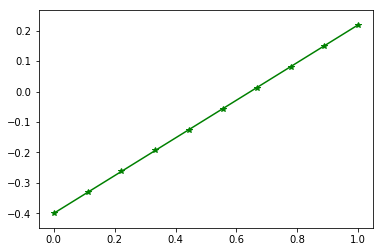

In [3]:
x = linspace(0,1,10)
X = column_stack([x**0, x**1])
y = X.dot(w)

figsize(6, 4)
plot(x, y, c='green', marker='*');
axis('equal');

A bit of explanation:
1. The `linspace` function is from the `numpy` package, which provides numerical operations on tensors. This function generates 10 equally spaced numbers betweeen 0 and 1 (including both 0 and 1). 
2. The `column_stack` function is from `numpy`, we are providing it with a list of vectors (1D tensors) and asking it to make a matrix (2D tensor) with those as its columns. 
3. In `numpy`, the `dot` method does matrix multiplication [using an `*` would multiply elementwise].

So,  there is a data matrix $\mathbf{X}$ that has a row for each sample ($x_i$) and a column for each feature $[\phi(x_n)]_k = x_n^k$. 

In [4]:
print X

[[ 1.          0.        ]
 [ 1.          0.11111111]
 [ 1.          0.22222222]
 [ 1.          0.33333333]
 [ 1.          0.44444444]
 [ 1.          0.55555556]
 [ 1.          0.66666667]
 [ 1.          0.77777778]
 [ 1.          0.88888889]
 [ 1.          1.        ]]


We need to imagine that each point on our curve is actually subject to some error. For simplicity, we will assume that all error is in the _vertical_ direction; that is, we are super-precise about the $x$ that we measure but the $y$ may have some noise.  

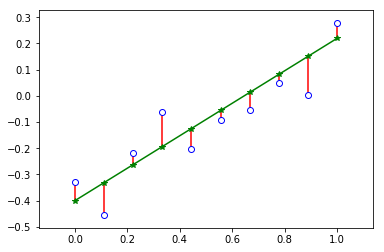

In [5]:
beta = 10
error = normal(scale=1./beta, size=len(y))
t = y + error

figsize(6, 4)
plot(x, y, color='green', marker='*', zorder=2)
scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)
vlines(x, y, t, color='red', zorder=1)

axis('equal');

So, we have a data matrix $\mathbf{X}$ and measurments $\mathbf{t}$. 


In order to create that dataset, I used a known $\mathbf{w}$ but in practice the line's parameters ar unknown; we only have $\mathbf{X}$ and $\mathbf{t}$ and the assumption that $\mathbf{t} = \mathbf{X}^T\mathbf{t}+E$ where $E$ follows a normal distribution. 

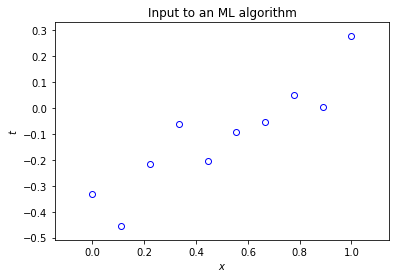

In [6]:
figsize(6,4)
scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)
axis('equal')
xlabel('$x$')
ylabel('$t$')
title("Input to an ML algorithm")
show()

## Exercise
In the next cell, write a function `phi(x, order)`.  The docstring for the function describes what it should do. 

In [7]:
def phi(x, order):
    """ Generate polynomial features for input `x`
    
    :param x: Either: (1) An array of $x$ values, or (2) as single $x$ value. 
    :param order: The order of the polynomial
    
    :return: A matrix `X` with `order+1` columns and `len(x)` 
             rows, so that `X[i,j]==x[i]**j`
    """
    x = atleast_1d(x) # <-- Make sure the input is an array
    M = order  # <-- Notation from the book
    N = len(x) 

    return np.column_stack([x ** j for j in range(0, M+1)]) #FIXED
    # return np.array([x ** j for j in range(0, M+1)]).T #FIXED

In [8]:
assert np.allclose(phi(0.5, order=2), [1., 0.5, 0.25])
assert np.allclose(phi(x, order=1), X), "Your output does not match the expected for our examples"

## Exercise
Write a function `eval_poly(x, w)` that takes as input a 1D array `x` and an array `w` of weights, and produces as output a 1D array `y`. 
> NOTE: It  is often useful to pass around $\mathbf{\phi}(\mathbf{x})$ instead of $\mathbf{x}$ for several reasons. Since python does not allow overloading functions, I have added some code to check whether or not a 1D or 2D array was passed in as the `x` parameter. 

In [9]:
def eval_poly(x, w):
    x = atleast_1d(x)
    M = len(w)-1
    N = len(x)
    if len(x.shape) == 1:
        x = phi(x, order=M)
        
    # TODO: Try to get it in one line!
    return x.dot(w) #FIXED

# Exercise
Write a function `sum_squared_error(x, w)` that takes as input _either_ a 1D array _or_ a 2D array returned from a prior call to `phi`, along with target values `t` and weights `w`. It should return $$E(\mathbf{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{y(x_n, \mathbf{w})-t_n\right\}^2,$$ from (1.2) of your book, however I want you to _avoid using loops_, instead try to use optimized `numpy` functions.

In [10]:
def sum_squared_error(t, x, w):
    x = atleast_1d(x)
    N = len(x)
    M = len(w)-1
    
    # Allow the first parameter to be either the array of `x` values, _or_ the 
    # complete feature matrix. 
    if len(x.shape)  == 1:
        x = phi(x, order=M)
    
    # TODO: Try to avoid loops!
    return 0.5 * ((eval_poly(x, w) - t) ** 2).sum() # FIXED

In [11]:
print ("The sum_squared_error of our test data," +
      "using the true `w` that generated it, is"), sum_squared_error(t, x, w)

The sum_squared_error of our test data,using the true `w` that generated it, is 0.0389369800318


## Exercise
Write a function that, given a parameter $\mathbf{w}$, along with an input matrix $\mathbf{X}=\phi(\mathbf{x})$ and the targets $\mathbf{t}$, evaluates the negative log likelihood $- \ln p( \mathbf{t} |\mathbf{x}, \mathbf{w}, \beta)$, where $\beta$ is the precision of the noise (e.g. 10 in our case I beleive).
> *NOTE:* I tend to pass around the _matrix_ $\mathbf{X} = \mathbf{\phi}(\mathbf{x})$ because
> 1. I do not want to keep re-evaluating `phi` unnecessarily
> 2. I feel like it reinforces the idea that what we are doing is _linear_, as in _linear algebra_. 
> 
> Since it the callers may not expect this, I will check whether the input is 1D or 2D and call $\phi(\mathbf{x})$ myself if necessary. 

Equation (1.62) of your book is:
$$
\begin{align}
\ln p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta) &= -\frac{\beta}{2}\sum_{n=1}^N \left\{y(x_n, \mathbf{w})-t_n\right\}^2 + \frac{N}{2}\ln \beta -\frac{N}{2}\ln(2\pi).
\end{align}
$$

However, most optimization libaries want to _minimize_ some objective function, so it is useful to calculate the _negative_ log likelihood. 

In [12]:
def neg_log_likelihood(t, x, w, beta=1):
    """ Evaluate the negative log likelihood of the data 
    
    Given data (x, t), and a setof linear weights `w` and noise precision `beta`, 
    find the negative natural log of the likelihood. 
    
    See eq. (1.62) of your book, but bear in mind I want the _negative_ log likelihood.
    """
    t = atleast_1d(t)
    x = atleast_1d(x)
    N = len(t)
    M = len(w)-1
    
    # TODO
        
    return -(-(beta/2.) * sum_squared_error(t, x, w) + (N/2.) * np.log(beta) - (N/2.) * np.log(2*np.pi)) #FIXED

Your textbook talks alot about the joint probability $p(t, x| \mathbf{w},\beta)$ or the conditional probability $p(t|x, \mathbf{w}, \beta)$. I think it is useful to try and plot the conditional probabilities for all $t$ and $x$ now that we have functions to calculate the likelihood. 

Some explanation of the code below:
* The (vertical) range of the data is unpredictable; it is the result of random $\mathbf{w}$.  I want top plot a $1\times1$ region, so I use the _center_ $y$ coordinate $c_y \pm \frac{1}{2}$ as the vertical range.
* In line 3 have already used the variable names `x` and `y`, so I declare two new variable using trailing underscored. *Trailing underscores are how we resolve name clashes in python*.
* Also in line 3, The `mgrid` object generates a 'mesh grid'; that is, it gives the $x$ and $y$ coordinates of every point on a grid. The number spacing of the grid elements is specified using python _slicing_ notation,
> *IMPORTANT*: Slicing is critical to effective use of python, read [here](https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm) or [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) or [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mgrid.html) for more. 
* In general, loops are bad in python. Given some time, I could probably find a non-loopy way to do lines 6-8, but it was not clear to me how to do so and the number of iterations (10,000) is small. This is a case where I am comfortable 'breaking' that rule of thumb. 

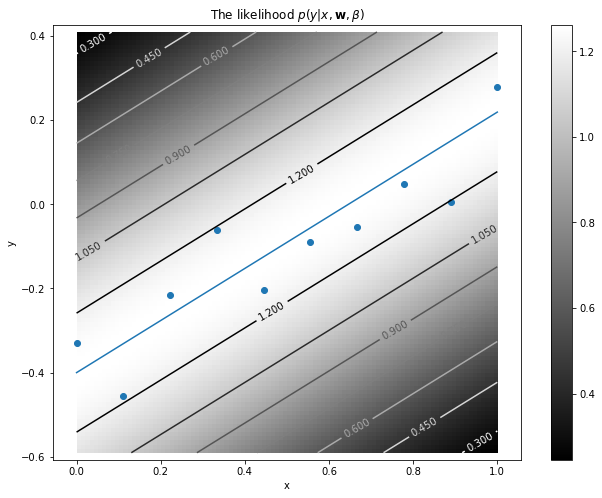

In [13]:
# Compute the NLL (Negative Log Likelihoods), discussed above
cy = (max(y)+min(y))/2.
y_, x_ = mgrid[cy-0.5:cy+0.5:100j, 0:1:100j]
nll = zeros((100,100))

for j in range(100):
    for i in range(100):
        nll[i,j] = neg_log_likelihood(y_[i,j], x_[i,j], w, beta=10)
              
p = exp(-nll)

# Plot The Figure, discussed below
figsize(10.5,8)
imshow(p, extent=[0, 1, cy-0.5, cy+0.5], origin='lower', cmap=cm.gray);
colorbar()
contours = contour(x_, y_, p, cmap=cm.gray_r)
clabel(contours)
scatter(x, t)
plot(x, y)
xlabel('x')
ylabel('y')
title(r'The likelihood $p(y|x,\mathbf{w},\beta)$')
axis('equal')
show()

Some explanation of the plotting code:
* The probabilities are in a 2D array `p`, which can be displayed with the `imshow` command. 
* By default, images are drawn with p[0,0] on the top-left; however in our images p[0,0] should be onthe bottom left. Hence, I passed `origin = lower`. 
* By default, `imshow` assumes pixel-indices = $(y,x)$ coordinates; however our $100\times100$ grid belongs in a different region. We use `extent=(xmin, xmax, ymin, ymax)` to position the image in the plot.  
* The `countour` function draws _iso-lines_ where the surface takes on constant values, and the `clabel` function modifies the graphics-object returned by `countour` by adding labels to each isoline. 
* When plotting data, I always like to keep an _equal_ aspect ration (do not stretch the $y$'s)

## Posterior probabilities
Our weights $\mathbf{w}$ where generated according to a Normal distibution with a mean of zero and a variance of one (scroll up, its true!). In practice, we may or may not know which distribution the wights come from, but heuristically we see good results if we assume polynomial weights are generated by zero-mean gaussians $$\mathbf{w} \sim \mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I})$$. 

According to the book (1.65), we can see that the prior $p(\mathbf{w}|\alpha)$ can be expressed as 
$$
\begin{align}
p(\mathbf{w}|\alpha) &= \mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I}) \\
                     &= \left(\frac{\alpha}{2\pi}\right)^{(M+1)/2} \exp\left\{-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}\right\}\\ 
\end{align}
$$

In practice, it is often better to work with the negative log likelihood (NLL), which we often seek to minimize. 

Can you come up with an expression for the negative log likelihood and type it out(using latex) in the next cell?

### Exercise 3: Write an expression for $-\ln p(\mathbf{w}|\alpha)$

$$
\begin{align}
-\ln p(\mathbf{w}|\alpha) &= \frac{\alpha}{2}\mathbf{w}^T\mathbf{w} - \frac{M+1}{2} \ln{\left(\frac{a}{2\pi}\right)}
\end{align} 
$$

Now that we have an expression for the likelihood and that prior, we have 
$$
\underbrace{p(\mathbf{w}|\mathbf{X}, \mathbf{t}, \alpha, \beta)}_{\text{posterior}} 
\propto 
\underbrace{p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta)}_{\text{likelihood}} 
\times 
\underbrace{p(\mathbf{w}|\alpha)}_{\text{prior}}
$$

### Find the minimum
$$
\begin{align}
w &= \arg\min_{\mathbf{w}} \left\{ -\ln p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) \right\}\\
  &= \arg\min_{\mathbf{w}} \left\{  \frac{\beta}{2}||\mathbf{X}\mathbf{w}-\mathbf{t}||^2-\frac{N}{2}\ln\beta + \frac{N}{2}\ln(2\pi) \right\}\\
  &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}||\mathbf{X}\mathbf{w}-\mathbf{t}||^2 \right\} \\
  &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-2\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{t}^T\mathbf{t}) \right\}\\
    &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}) \right\}\\
\end{align}$$

The derivative with respect to the vector $\mathbf{w}$ is 
$$
\begin{align}
\frac{\partial}{\partial \mathbf{w}}\left\{ \frac{1}{2}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}\right\} &= \frac{1}{2}\frac{\partial}{\partial \mathbf{w}}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} -\frac{\partial}{\partial \mathbf{w}}\mathbf{t}^T\mathbf{X}\mathbf{w} \\
&= \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X}\\
\left(\frac{\partial (\cdot)}{\partial \mathbf{w}}\right)^T&= \mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{t}\\
\end{align}$$

> The derivatives of matrix equations can be tricky; it is useful to consult a good linear algebra book or [this document](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf).  Note that the rule we use is proposition 9 of that document; so that the the gradient $\nabla f(\mathbf{x}) = \left(\frac{\partial f}{\partial \mathbf{x}}\right)^T$ in our case. 


### Exercise: 

#### (a) Write a solution for the MLE for $\mathbf{w}$ using numpy

In [22]:
def mle_w(X, t):
    N = X.shape[0]
    M = X.shape[1]-1
    assert len(t) == N, "The number of targets must match the number of inputs"
    
    # Solving for 'w' is now just about a 1-liner....
    return linalg.solve(X.T.dot(X), X.T.dot(t))

#### (b) Plot the curve along with a scatter plot of the points
(Follow the example from the first part of this presentation)

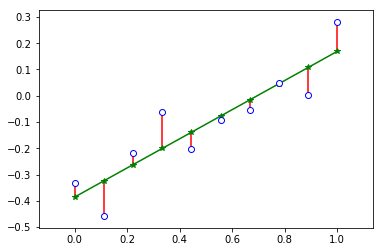

In [23]:
y_predicted = X.dot(mle_w(X, t))

figsize(6, 4)
plot(x, y_predicted, c='green', marker='*');
scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)
vlines(x, y_predicted, t, color='red', zorder=1)
axis('equal');

#### (c)  Evaluate the sum-squared-error and compare to the error we get from the 'true' $\mathbf{w}$.

In [29]:
#TODO:  MLE error is....
print ("The sum_squared_error of our test data, " +
       "using the computed `w`, is"), sum_squared_error(t, x, mle_w(X, t))
#TODO:  Ground truth error is...
print ("The sum_squared_error of our test data, " +
       "using the true `w` that generated it, is"), sum_squared_error(t, x, w)

The sum_squared_error of our test data, using the computed `w`, is 0.0352499558149
The sum_squared_error of our test data, using the true `w` that generated it, is 0.0389369800318


### Exercise 5:  

#### (a) Write a solution for the MAP estimate
\begin{align}
- \ln p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta) &= \frac{\beta}{2}\sum_{n=1}^N \left\{y(x_n, \mathbf{w})+ t_n\right\}^2 -\frac{N}{2}\ln \beta -\frac{N}{2}\ln(2\pi) + \frac{\alpha}{2}\mathbf{w}^T\mathbf{w} - \frac{M+1}{2} \ln{\left(\frac{a}{2\pi}\right)}
\end{align}
$$\frac{\partial}{\partial \mathbf{w}} - \ln p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta)$$

In [41]:
def map_w(X, t, alpha, beta):
    N = X.shape[0]
    M = X.shape[1]-1
    assert len(t) == N, "The number of targets must match the number of inputs"
    
    # Solving for 'w' is now just about a 1-liner....
    return linalg.solve(beta * X.T.dot(X) + alpha * eye(M), beta * X.T.dot(t))

#### (b)  Plot your solution

The sum_squared_error of our test data, using the computed `w` for mle, is 0.0352499558149
The sum_squared_error of our test data, using the computed `w` for map, is 0.0352961788481


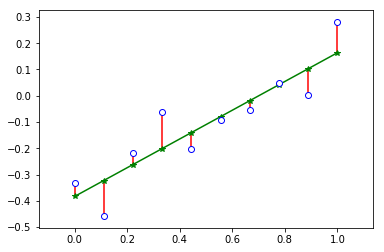

In [42]:
y_predicted = X.dot(map_w(X, t, alpha, beta))

figsize(6, 4)
plot(x, y_predicted, c='green', marker='*');
scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)
vlines(x, y_predicted, t, color='red', zorder=1)
axis('equal');

print ("The sum_squared_error of our test data, " +
       "using the computed `w` for mle, is"), sum_squared_error(t, x, mle_w(X, t))
print ("The sum_squared_error of our test data, " +
       "using the computed `w` for map, is"), sum_squared_error(t, x, map_w(X, t, alpha, beta))

#  Boston

I am told that students have a hard time learning the concepts with a clear sense of their application. Linear regressions is covered in chapter one because it is so ubuquitious an, although it seems _easy_ to understand, there are many nuances to it that reveal the fundamental problems we encounter in machine learning. 

If you want to use some more _realistic_ data, consider the problem of predicting the price of a home in Boston. This is a real dataset that has been used so much it has become a bit of a standard, and there is a simple python function to load the data. 

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.DESCR

## The plan
1. I will show you the sklearn example that predicts home values given the other properties.
2. We will dive in to figure out what these functions might be doing by re-implementing them ourselves. 

I did not have time to 'script' this part out, so it would be a work-along activity in class.

In [ ]:
import sklearn.model_selection
import sklearn.linear_model

In [ ]:
lr = sklearn.linear_model.LinearRegression()

X = boston.data
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = sklearn.model_selection.cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()